# Visualização dos microdados das matriculas da rede municipal de educação do município de SP

In [16]:
import folium
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from branca.element import Template, MacroElement
from pandas.plotting import parallel_coordinates

sns.set(rc={'figure.figsize':(20,10)})

In [18]:
matriculas = pd.read_csv('data/Matriculas.csv', encoding = "ISO-8859-1", sep = ';')
matriculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9270625 entries, 0 to 9270624
Data columns (total 60 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   AN_LETIVO              int64  
 1   NOME_ESCOLA            object 
 2   CD_INEP_ESCOLA         float64
 3   CD_TURMA               int64  
 4   CD_TURNO               int64  
 5   CD_SERIE               int64  
 6   CD_ETAPA_ENSINO        float64
 7   CD_CICLO_ENSINO        float64
 8   CD_TIPO_TURMA          float64
 9   CD_TIPO_PROGRAMA       float64
 10  QUI                    float64
 11  CD_ALUNO_SME           int64  
 12  ANO_NASC_ALUNO         float64
 13  MES_NASC_ALUNO         float64
 14  IDADE_ALUNO_ANO_CIVIL  float64
 15  IDADE_ALUNO_3103       float64
 16  CD_SEXO                object 
 17  CD_RACA_COR            int64  
 18  NEE_ALT_HAB            float64
 19  DEF__AUTISMO           float64
 20  DEF__SURDEZ_LEVE       float64
 21  DEF__SURDEZ_SEV        float64
 22  DEF__INTELECT     

In [24]:
anos = ['2019', '2018', '2017', '2016']
valores = []
codigosEscolas = []
qtd = 0

# para cada um dos anos
for idx, ano in enumerate(anos):

    # pego os dados das escolas
    escolas = pd.read_csv('data/escolas/Escolas_' + ano + '.csv', encoding = "ISO-8859-1", sep = ';')

    # a coluna codinep é renomeada para padronização, pois em alguns anos ela se encontra em maiusculo
    escolas.rename(columns={'codinep': 'CODINEP'}, inplace=True)

    # para cada um dos codigos 'unicos' da tabela
    for codigoEscola in escolas['CODINEP'].unique():
        
        # caso nao tenha nenhum registro nos valores
        if codigoEscola not in codigosEscolas:

            # pego a quantidade de matriculas, usando a tabela de matriculas e o codigo da escola
            escolaCodigo = matriculas.loc[matriculas['CD_INEP_ESCOLA'] == float(codigoEscola)]
            quantidadeMatriculas = len(escolaCodigo)

            # caso essa escola tenha ao menos 1 matricula
            if quantidadeMatriculas > 0:
                anoEscola = escolaCodigo['AN_LETIVO'].values[0]

                # pego seus dados na tabela de escolas
                escola = escolas.loc[escolas['CODINEP'] == codigoEscola]
                
                # se existir essa escola
                if len(escola) == 1:

                    try:
                        latitude = escola['latitude'].values[0].split('.')
                        longitude = escola['longitude'].values[0].split('.')
                    except:
                        print(escola.info())
                        break
                    
                    if len(latitude) > 2 and len(longitude) > 2:
                        latitudePrimeiro = latitude[0]
                        longitudePrimeiro = longitude[0]

                        if len(latitudePrimeiro) > 2 and len(longitudePrimeiro) > 2:
                            
                            if latitude[0] == '-23' and longitude[0] == '-46':
                                latitude = float(latitude[0] + '.' + latitude[1] + latitude[2])
                                longitude = float(longitude[0] + '.' + longitude[1] + longitude[2])
                                
                                codigosEscolas.append(codigoEscola)
                                valores.append([int(anoEscola), codigoEscola, escola['nomesc'].values[0], latitude, longitude, quantidadeMatriculas])
                            else:
                                qtd+=1
                                print('Error, localidade errada: ', latitude, longitude,', isso aconteceu ', qtd, ' vezes, e contando...')

tabelaEscolas = pd.DataFrame(valores, columns=['ANO', 'CODIGO_INEP', 'NOME', 'LATITUDE', 'LONGITUDE', 'MATRICULAS'])
tabelaEscolas.to_csv('data/escolas/Escolas.csv', sep=';', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 8 to 8
Data columns (total 53 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DRE          1 non-null      object 
 1   CODESC       1 non-null      int64  
 2   TIPOESC      1 non-null      object 
 3   NOMESC       1 non-null      object 
 4   DIRETORIA    1 non-null      object 
 5   SUBPREF      1 non-null      object 
 6   CEU          0 non-null      object 
 7   ENDERECO     1 non-null      object 
 8   NUMERO       1 non-null      object 
 9   BAIRRO       1 non-null      object 
 10  CEP          1 non-null      int64  
 11  TEL1         1 non-null      object 
 12  TEL2         0 non-null      object 
 13  FAX          0 non-null      object 
 14  SITUACAO     1 non-null      object 
 15  CODDIST      1 non-null      float64
 16  DISTRITO     1 non-null      object 
 17  SETOR        1 non-null      float64
 18  CODINEP      1 non-null      float64
 19  CODCIE      

In [78]:
tabelaEscolas = pd.read_csv('data/escolas/Escolas.csv', encoding = "ISO-8859-1", sep = ';')

print(tabelaEscolas.info())
tabelaEscolas.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ANO          3028 non-null   int64  
 1   CODIGO_INEP  3028 non-null   float64
 2   NOME         3028 non-null   object 
 3   LATITUDE     3028 non-null   float64
 4   LONGITUDE    3028 non-null   float64
 5   MATRICULAS   3028 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 142.1+ KB
None


(3028, 6)

In [25]:
anLetivo = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012]
dados = []

for an in anLetivo:
    data = matriculas.loc[matriculas['AN_LETIVO'] == an]

    for id_inep in data['CD_INEP_ESCOLA'].unique():
        escola = data.loc[data['CD_INEP_ESCOLA'] == id_inep]

        dados.append([an, id_inep, escola['NOME_ESCOLA'].unique()[0], escola.shape[0]])

tabelaMatricula = pd.DataFrame(dados, columns=['ANO', 'COD_INEP', 'NOME', 'QTD_MATRICULAS'])
tabelaMatricula.to_csv('data/Matriculas_escolas.csv', sep=';', index=False, line_terminator='')

In [26]:
tabelaMatricula = pd.read_csv('data/Matriculas_escolas.csv', encoding = "ISO-8859-1", sep = ';')
tabelaMatricula.shape

(25713, 4)

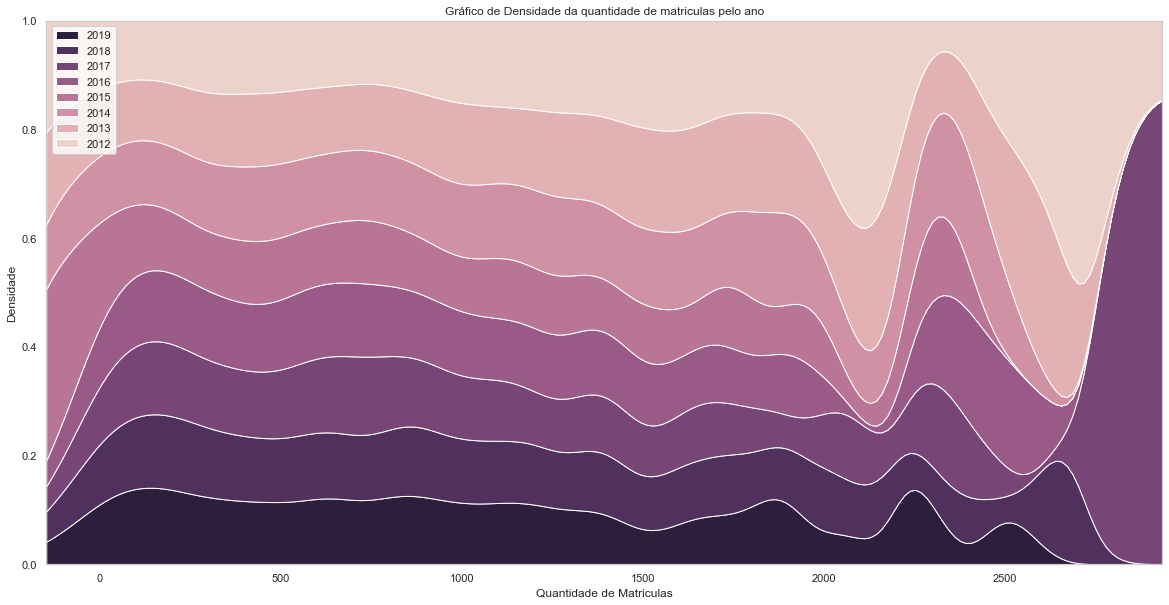

In [27]:
# set seaborn whitegrid theme
sns.set(style="whitegrid")

# stacked density plot
sns.kdeplot(data=tabelaMatricula, x="MATRICULAS", hue="ANO", common_norm=False, multiple="fill", alpha=1)
plt.legend([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012], loc='upper left')

plt.title('Gráfico de Densidade da quantidade de matriculas pelo ano')
plt.xlabel('Quantidade de Matriculas')
plt.ylabel('Densidade')

# show the graph
plt.show()

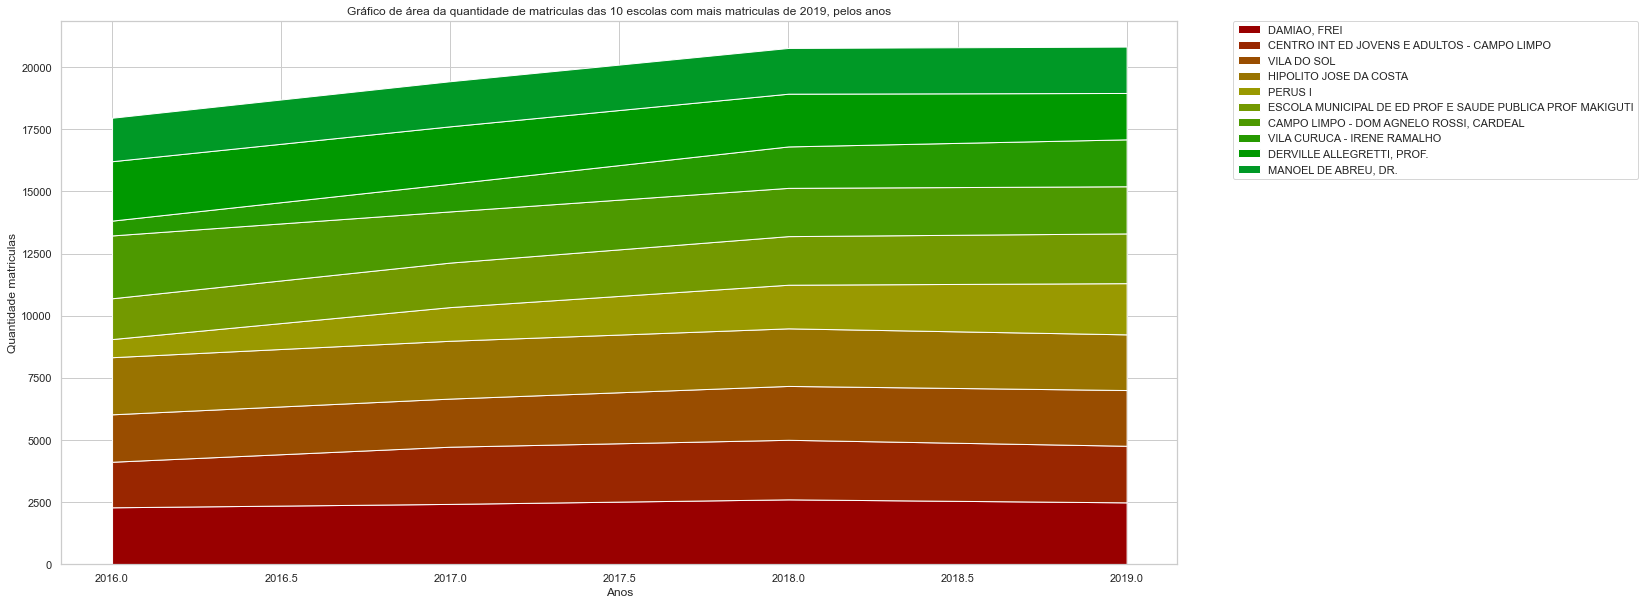

In [28]:
anos = [2019, 2018, 2017, 2016]
y = []
nomes = []

# apenas para o ano de 2019
for ano in anos[:1]:

    # ordeno os dados
    tabelaMatriculaSort = tabelaMatricula.loc[tabelaMatricula['ANO'] == ano].sort_values(by=['ANO', 'QTD_MATRICULAS'], ascending=False)
    
    # pego os 10 caras com mais matriculas
    tabelaMatriculaTop10 = tabelaMatriculaSort[:10]

    # lista dos nomes da escola
    nomes = tabelaMatriculaTop10['NOME'].tolist()

    # para cada um dos valores, adiciono na lista
    for values in tabelaMatriculaTop10['QTD_MATRICULAS'].tolist():
        list = [values]
        y.append(list)

    # para os anos restantes
    for ano in anos[1:]:
        values = []

        # para cada escola
        for idx, cd in enumerate(tabelaMatriculaTop10['COD_INEP'].tolist()):

            # procuro na tabela geral pelos dados da escola daquele ano
            tabelaMatriculaSort = tabelaMatricula.loc[(tabelaMatricula['ANO'] == ano) & (tabelaMatricula['COD_INEP'] == cd)]
            
            # adiciono na lista de matriculas daquele valor
            y[idx].append(tabelaMatriculaSort['QTD_MATRICULAS'].tolist()[0])

# paleta de cores
paleta = ['#990000', '#992600', '994d00', '#997300', '#999900', '#739900', '#4d9900', '#269900', '#009900', '#009926']

# ploto o gráfico
plt.stackplot(anos, y, colors=paleta)

# formato a legenda
plt.legend(nomes, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.title('Gráfico de área da quantidade de matriculas das 10 escolas com mais matriculas de 2019, pelos anos')
plt.xlabel('Anos')
plt.ylabel('Quantidade matriculas')

# mostra o gráfico
plt.show()

In [29]:
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>
 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Número de matrículas</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:green;opacity:0.7;'></span>>3000</li>
    <li><span style='background:orange;opacity:0.7;'></span>2000~3000</li>
    <li><span style='background:red;opacity:0.7;'></span>1000~2000</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

In [54]:
escolas = pd.read_csv('data/escolas/Escolas.csv', encoding = "ISO-8859-1", sep = ';')
print(escolas.info())
data = pd.DataFrame(escolas)

data['CODIGO_INEP'] = pd.to_numeric(data['CODIGO_INEP'], errors="coerce")

data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ANO          3028 non-null   int64  
 1   CODIGO_INEP  3028 non-null   float64
 2   NOME         3028 non-null   object 
 3   LATITUDE     3028 non-null   float64
 4   LONGITUDE    3028 non-null   float64
 5   MATRICULAS   3028 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 142.1+ KB
None


,ANO,CODIGO_INEP,NOME,LATITUDE,LONGITUDE,MATRICULAS
0,2019,35098462.0,"ALIPIO CORREA NETO, PROF",-23.612237,-46.749888,4251
1,2019,35098504.0,"ANTONIO CARLOS PACHECO E SILVA, PROF",-23.611929,-46.750176,2412
2,2019,35098474.0,PROFA. EDA TEREZINHA CHICA MEDEIROS,-23.602076,-46.783825,5005
3,2019,35076181.0,PROFA. MARIA ALICE BORGES GHION,-23.586959,-46.801039,7993
4,2019,35200074.0,PROF. BENEDICTO CASTRUCCI,-23.586339,-46.800967,2851
...,...,...,...,...,...,...
3023,2019,35004187.0,RECANTO DOS PRIMINHOS,-23.676308,-46.687254,821
3024,2019,35005070.0,CANTINHO DO ERASMO,-23.713963,-46.623428,330
3025,2019,35568478.0,IRINEO GONCALVES,-23.588397,-46.498818,536
3026,2018,35577923.0,CEAR PROXIMOS PASSOS JARDIM ESTHER,-23.621839,-46.464462,471


In [79]:
mapa = folium.Map(location=[-23.5489, -46.6388], zoom_start=11)
mapa.get_root().add_child(macro)

tam = len(data.values)/2

for values in data.values[int(tam):]:
    title = values[2]

    if values[5] >= 1000 and values[5] < 2000:
        cor='red'
    elif values[5] >= 2000 and values[5] < 3000:
        cor='orange'
    elif values[5] >= 3000:
        cor='green'

    folium.CircleMarker(
        location=[values[3], values[4]],
        radius=25,
        popup="<i>Quantidade de alunos matriculados: " + str(values[5]) + "</i>",
        color="#3186cc",
        fill=True,
        fill_color=cor,
        tooltip=title
    ).add_to(mapa)

mapa.save('result/2/mapa_circle.html')

mapa = folium.Map(location=[-23.5489, -46.6388], zoom_start=11)
mapa.get_root().add_child(macro)

for values in data.values[int(tam):]:
    title = values[2]
    text = ''

    if values[5] >= 1000 and values[5] < 2000:
        text='angle-down'
        color='red'
    elif values[5] >= 2000 and values[5] < 3000:
        text='angle-up'
        color='orange'
    elif values[5] >= 3000:
        text='angle-double-up'
        color='green'

    if text != '':
        folium.Marker(
            location=[values[3], values[4]], 
            popup="<i>Quantidade de alunos matriculados: " + str(values[5]) + "</i>",
            tooltip=title,
            icon=folium.Icon(color=color, icon=text, prefix='fa')
        ).add_to(mapa)

mapa.save('result/2/mapa_marker_1000.html')